# HW 4 Simulation

## Q1 

In [253]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [254]:
def simulate_lifetime_income(p):
    
    """
    Simulation profile p is structured as a dictionary
    
    p = {
         'inc0'         :80000,   #average initial income
         'g'            :0.03,    #long-run growth rate of income
         'st_year'      :2019     #year start to work
         'num_years'    :40,      #years to work
         'num_draws'    :10000,   #number of simulation
         'initial_seed' :0,       #initial random seed number
         'sigma'        :0.1      #standard deviation of a random error
         'rho'          :0.2      #correlation of two 
    }
    """
    
    #set random seed
    np.random.seed(p['initial_seed'])
    
    ln_errors = np.random.normal(loc = 0, scale = p['sigma'], size = (p['num_years'], p['num_draws']))
    
    #create a matrix of dim (num_years, num_draws)
    ln_income_mat = np.zeros((p['num_years'], p['num_draws']))
    
    #fill the matrix
    ln_income_mat[0,:] = np.log(p['inc0']) + ln_errors[0, :]
    
    #loop and apply model
    for yr in range(1, p['num_years']):
        ln_income_mat[yr,:] = (1 - p['rho']) * (np.log(p['inc0']) + p['g'] * yr) + p['rho'] * ln_income_mat[yr - 1, :] + ln_errors[yr, :]
    
    income_matrix = np.exp(ln_income_mat)
   
    return income_matrix

Text(0,0.5,'Simulated income (\\$s)')

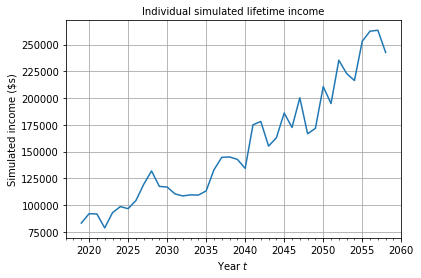

In [255]:
simulation_profile = {
    'inc0'           :80000,
    'g'              :0.03,
    'st_year'        :2019,
    'num_years'      :40,
    'num_draws'      :10000,
    'initial_seed'   :0,
    'sigma'          :0.1,
    'rho'            :0.2
}

income_mat = simulate_lifetime_income(simulation_profile)

%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['num_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Simulated income (\$s)')

## Q2

Text(0.5,1,'Histogram for Simulated Initial Income')

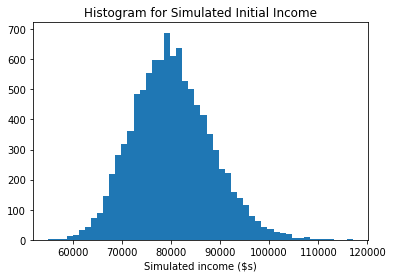

In [256]:
plt.hist(income_mat[0,:], bins=50)
plt.xlabel(r'Simulated income (\$s)')
plt.title('Histogram for Simulated Initial Income')

In [257]:
income_below = np.mean(income_mat[0,:] < 70000)
print(income_below)

0.0931


In [258]:
income_above = np.mean(income_mat[0,:] > 100000)
print(income_above)

0.0124


After running 10000 simulation, we know that around 9.31% of the students  earn an income less than \$70000 in 2019, and 1.24% of the students can earn an income over $10000 in 2019. The histogram of the simulated initial income looks quite like a normal idstribution, although we can see the tail is heavier on the right side of the distribution.  

## Q3

In [259]:
def find_repayment(p, income_mat):
    repayment = np.zeros((p['num_years'], p['num_draws']))
    cum_repay = np.zeros((p['num_years'], p['num_draws']))
    for yr in range(0, p['num_years']):
        repayment[yr, :] = income_mat[yr, :] * 0.1
        if yr == 0:
            cum_repay[0, :] = repayment[yr, :]
        else:
            cum_repay[yr, :] = cum_repay[yr - 1, :] + repayment[yr, :]    
    return cum_repay

In [260]:
def find_repayment_year(p, income_mat):
    repayment_year = [0]*p['num_draws']
    cum_repayment = find_repayment(p, income_mat)
    for draw in range(0, p['num_draws']):
        for yr in range(0, p['num_years']):
            if cum_repayment[yr, draw] >= 95000:
                repayment_year[draw] = yr + 1
                break
    return repayment_year 


In [261]:
def find_percentage(p, matrix):
    count = 0
    for draw in range(0, p['num_draws']):
        if matrix[draw] <= 10:
            count += 1
    percentage = count/p['num_draws']
    return percentage

repayment_yr = find_repayment_year(simulation_profile, income_mat)
pct = find_percentage(simulation_profile, repayment_yr)
print(pct)

0.1794


Text(0.5,1,'Histogram for years to pay-off debt')

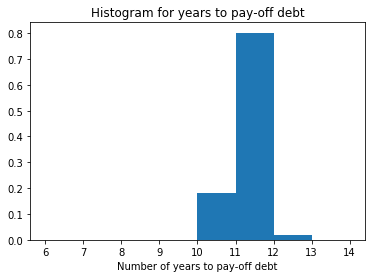

In [262]:
plt.hist(repayment_yr, density = True, bins = np.arange(min(repayment_yr)-3, max(repayment_yr)+3))
plt.xlabel(r'Number of years to pay-off debt')
plt.title(r'Histogram for years to pay-off debt')        

As calculated above, around 17.94% of the students are able to repay their debts in ten years.

## Q4

0.7032


Text(0.5,1,'Histogram for years to pay-off debt')

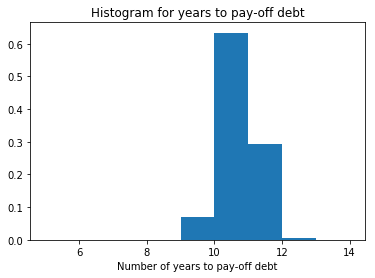

In [263]:
new_profile = {
    'inc0'            :85000,
    'g'               :0.03,
    'st_year'         :2019,
    'num_years'       :40,
    'num_draws'       :10000,
    'initial_seed'    :0,
    'sigma'           :0.15,
    'rho'             :0.2,  
}

new_income = simulate_lifetime_income(new_profile)

new_repayment_yr = find_repayment_year(new_profile, new_income)

pct_new = find_percentage(new_profile, new_repayment_yr)
print(pct_new)

plt.hist(new_repayment_yr, density = True, bins = np.arange(min(new_repayment_yr)-3, max(new_repayment_yr)+3))
plt.xlabel(r'Number of years to pay-off debt')
plt.title(r'Histogram for years to pay-off debt')

After applying to the new simulation profile, there is a significant increase of the percentage of students who can repay their debts in ten years, from 17.94% to 70.32%. 